In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Dongen_Master\Desktop\L4T4\Dataset .csv")


In [3]:
# Display the first few rows of the dataframe
df.head()

# Display column names and basic information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
# Check for unique values in the 'Online Delivery' column
df['Has Online delivery'].unique()


array(['No', 'Yes'], dtype=object)

In [7]:
# Count the number of restaurants offering online delivery
total_restaurants = df.shape[0]
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]

# Calculate the percentage
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100
print(f"Percentage of restaurants offering online delivery: {percentage_online_delivery:.2f}%")


Percentage of restaurants offering online delivery: 25.66%


In [8]:
# Convert the 'Rating' column to numeric, forcing errors to NaN
df['Rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Calculate average ratings
average_rating_online_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_online_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f"Average rating for restaurants with online delivery: {average_rating_online_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {average_rating_no_online_delivery:.2f}")


Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.47


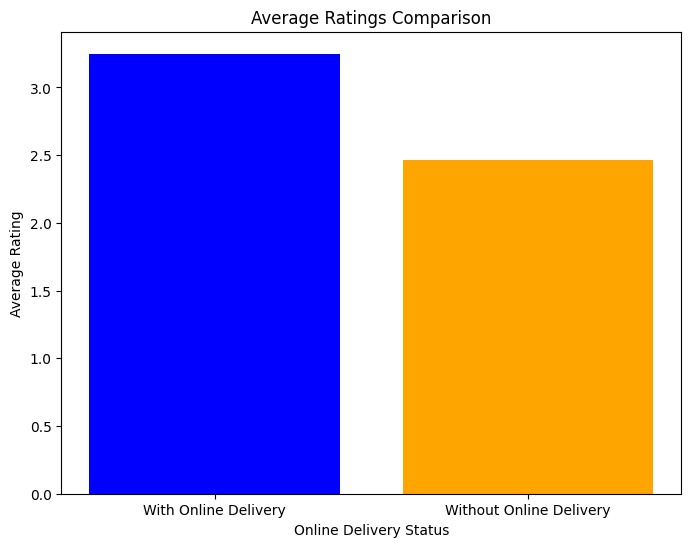

In [12]:
labels = ['With Online Delivery', 'Without Online Delivery']
ratings = [average_rating_online_delivery, average_rating_no_online_delivery]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, ratings, color=['blue', 'orange'])
plt.xlabel('Online Delivery Status')
plt.ylabel('Average Rating')
plt.title('Average Ratings Comparison')

# Save the plot as a PNG file
plt.savefig('average_ratings_comparison.png')

# Display the plot
plt.show()